<a href="https://colab.research.google.com/github/Abdelrahman26/Sentiment-Analysis-Of-Arabic_Tweets/blob/main/Data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#python libraries : 

In [2]:
from collections import Counter
import nltk
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from prettytable import PrettyTable
from matplotlib import rcParams
import matplotlib.cm as cm
import string
import re
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn import preprocessing
import pandas
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#import streamlit as st
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
 # Dataset : 

In [8]:
data = pd.read_csv('/content/new_datax.csv') 

In [10]:
data.head() 

,Unnamed: 0,dialect,tweet
0,0,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,2,IQ,@KanaanRema مبين من كلامه خليجي
3,3,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,4,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [11]:
data.shape

(9000, 3)

In [12]:
data.rename(columns = {"tweet":"phrase"}, inplace = True)

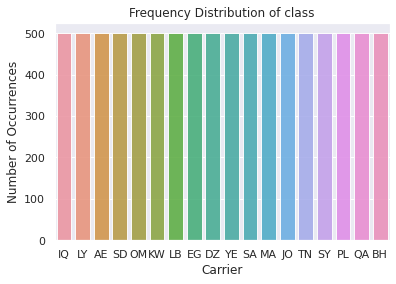

In [14]:
carrier_count = data["dialect"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of class')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

IQ    500
LY    500
AE    500
SD    500
OM    500
KW    500
LB    500
EG    500
DZ    500
YE    500
SA    500
MA    500
JO    500
TN    500
SY    500
PL    500
QA    500
BH    500
Name: dialect, dtype: int64

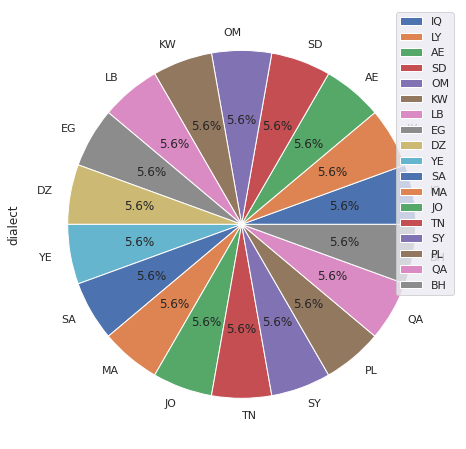

In [17]:
data["dialect"].value_counts().head(18).plot(
    kind='pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

data["dialect"].value_counts()

In [18]:
nltk.download('punkt')
nltk.word_tokenize(data["phrase"][0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['@', 'Nw8ieJUwaCAAreT', 'لكن', 'بالنهاية', '..', 'ينتفض', '..', 'يغير', '.']

# Testing different Tokenizers

In [19]:
# Tokenize using the white spaces
nltk.tokenize.WhitespaceTokenizer().tokenize(data["phrase"][0])

['@Nw8ieJUwaCAAreT', 'لكن', 'بالنهاية', '..', 'ينتفض', '..', 'يغير', '.']

In [20]:
# Tokenize using Punctuations
nltk.tokenize.WordPunctTokenizer().tokenize(data["phrase"][0])

['@', 'Nw8ieJUwaCAAreT', 'لكن', 'بالنهاية', '..', 'ينتفض', '..', 'يغير', '.']

In [21]:
# Tokenization using grammer rules
nltk.tokenize.TreebankWordTokenizer().tokenize(data["phrase"][0])

['@', 'Nw8ieJUwaCAAreT', 'لكن', 'بالنهاية', '..', 'ينتفض', '..', 'يغير', '.']

In [22]:
words = nltk.tokenize.WhitespaceTokenizer().tokenize(data["phrase"][0])

In [23]:
print(words)

['@Nw8ieJUwaCAAreT', 'لكن', 'بالنهاية', '..', 'ينتفض', '..', 'يغير', '.']


In [24]:
df = pd.DataFrame()

In [25]:
df['OriginalWords'] = pd.Series(words)

In [26]:
df

,OriginalWords
0,@Nw8ieJUwaCAAreT
1,لكن
2,بالنهاية
3,..
4,ينتفض
5,..
6,يغير
7,.


#Find the best Lemmatizar on arabic

In [29]:
# LEMMATIZATION
words = nltk.tokenize.WhitespaceTokenizer().tokenize(data["phrase"][0])
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(words)

In [31]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [32]:
# WordNet Lemmatization
wordNetLemmatizedWords = [
    nltk.stem.WordNetLemmatizer().lemmatize(word) for word in words]
df['WordNetLemmatizer'] = pd.Series(wordNetLemmatizedWords)
df

,OriginalWords,WordNetLemmatizer
0,يأكل,يأكل
1,أكل,أكل
2,الأكل,الأكل


In [ ]:
!pip install qalsadi
import qalsadi.lemmatizer

In [38]:
# Qalsadi Lemmatization
lemmer = qalsadi.lemmatizer.Lemmatizer()
qalsadiLemmatizedWords = [
    lemmer.lemmatize_text(word) for word in words]
df['qalsadiLemmatizer'] = pd.Series(qalsadiLemmatizedWords)
df

,OriginalWords,WordNetLemmatizer
0,يأكل,[أكل]
1,أكل,[كل]
2,الأكل,[أكل]


In [ ]:
# Dataset analysis : 

In [42]:
data['phrase'].head() 

0     @Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1    @7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2                      @KanaanRema مبين من كلامه خليجي
3           @HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4                   @hmo2406 وين هل الغيبه  اخ محمد 🌸🌺
Name: phrase, dtype: object

In [ ]:
# Checking null values 

In [45]:
data[data.isnull().any(axis=1)].head()

,Unnamed: 0,dialect,phrase


In [ ]:
#Checking null values count

In [46]:
np.sum(data.isnull().any(axis=1))

0

In [ ]:
#cleaning tweet text : 

In [47]:
data.head()

,Unnamed: 0,dialect,phrase
0,0,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,2,IQ,@KanaanRema مبين من كلامه خليجي
3,3,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,4,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [48]:
# Preprocess data : 

In [49]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

In [50]:
# Remove_punctuations :

In [52]:
def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
# Normalize_arabic : 

In [54]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [ ]:
# Remove_repeating_char: 

In [55]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
#processPost for applying all functions 

In [57]:
def processPost(tweet):
    # Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)

    # Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)

    # Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet = remove_punctuations(tweet)

    # normalize the tweet
    # tweet= normalize_arabic(tweet)

    # remove repeated letters
    tweet = remove_repeating_char(tweet)

    return tweet

In [ ]:
# Applying processPost function for preprocessing 

In [58]:
data["phrase"] = data["phrase"].apply(lambda x: processPost(x))

In [59]:
data.head()

,Unnamed: 0,dialect,phrase
0,0,IQ,لكن بالنهاية ينتفض يغير
1,1,IQ,يعني هذا محسوب على البشر حيونه وحشيه وتطلبون ...
2,2,IQ,مبين من كلامه خليجي
3,3,IQ,يسلملي مرورك وروحك الحلوه💐
4,4,IQ,وين هل الغيبه اخ محمد 🌸🌺


In [60]:
# Getting Tokenize the tweet text 

In [61]:
tokenizer = RegexpTokenizer(r'\w+')
data["phrase"] = data["phrase"].apply(tokenizer.tokenize)

In [62]:
data["phrase"].head()

0                         [لكن, بالنهاية, ينتفض, يغير]
1    [يعني, هذا, محسوب, على, البشر, حيونه, وحشيه, و...
2                             [مبين, من, كلامه, خليجي]
3                       [يسلملي, مرورك, وروحك, الحلوه]
4                          [وين, هل, الغيبه, اخ, محمد]
Name: phrase, dtype: object

In [64]:
# Stop words  (English words which does not add much meaning to a sentence)

In [67]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
stopwords_list = stopwords.words('arabic')

In [ ]:
stopwords_list

In [70]:
print(len(stopwords_list))

754


In [71]:
listToStr = ' '.join(stopwords_list)

In [72]:
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

In [73]:
# Removing stop words 
data['phrase'] = data['phrase'].apply(
    lambda x: [item for item in x if item not in stopwords_list])

In [74]:
data.head()

,Unnamed: 0,dialect,phrase
0,0,IQ,"[بالنهاية, ينتفض, يغير]"
1,1,IQ,"[يعني, محسوب, البشر, حيونه, وحشيه, وتطلبون, ال..."
2,2,IQ,"[مبين, كلامه, خليجي]"
3,3,IQ,"[يسلملي, مرورك, وروحك, الحلوه]"
4,4,IQ,"[وين, الغيبه, اخ, محمد]"


In [75]:
# Tweet text information 
all_words = [word for tokens in data['phrase'] for word in tokens]

In [76]:
sentence_lengths = [len(tokens) for tokens in data['phrase']]

In [77]:
VOCAB = sorted(list(set(all_words)))

In [78]:
print("%s words total, with a vocabulary size of %s" %
      (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

103027 words total, with a vocabulary size of 35942
Max sentence length is 48


In [79]:
# Counter all_words :

In [80]:
counter = Counter(all_words)

In [81]:
counter.most_common(25)

[('الي', 1242),
 ('اله', 1196),
 ('انا', 613),
 ('واله', 578),
 ('مش', 498),
 ('ان', 473),
 ('شي', 421),
 ('انت', 357),
 ('يعني', 312),
 ('يارب', 295),
 ('مو', 249),
 ('شو', 228),
 ('ليش', 227),
 ('ربي', 217),
 ('كتير', 205),
 ('الناس', 203),
 ('علي', 200),
 ('قصقص', 197),
 ('اذا', 196),
 ('انه', 194),
 ('اي', 190),
 ('او', 190),
 ('الا', 187),
 ('عشان', 187),
 ('عم', 183)]

In [83]:
counted_words = Counter(all_words)

In [84]:
#top 25 words in positive 

In [85]:
words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

<BarContainer object of 25 artists>

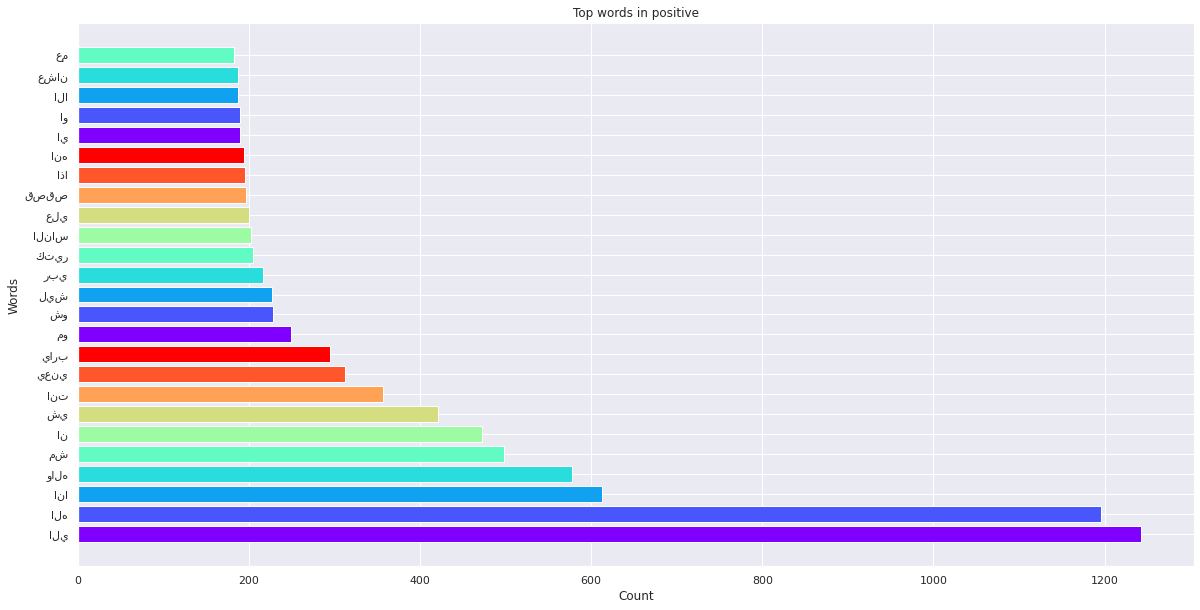

In [86]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in positive')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [87]:
# Features Extraction from tweets text with TFIDF unigram

In [89]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features=10000)

In [ ]:
unigramdataGet = word_vectorizer.fit_transform(data['phrase'].astype('str'))
unigramdataGet = unigramdataGet.toarray()

vocab = word_vectorizer.get_feature_names()
unigramdata_features = pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features[unigramdata_features > 0] = 1
unigramdata_features.head()

In [93]:
unigramdata_features.to_csv('/content/unigramdata_features.csv')

In [ ]:
# Encoding classes: 

In [94]:
pro = preprocessing.LabelEncoder()
pro

LabelEncoder()

In [95]:
data.head()

,Unnamed: 0,dialect,phrase
0,0,IQ,"[بالنهاية, ينتفض, يغير]"
1,1,IQ,"[يعني, محسوب, البشر, حيونه, وحشيه, وتطلبون, ال..."
2,2,IQ,"[مبين, كلامه, خليجي]"
3,3,IQ,"[يسلملي, مرورك, وروحك, الحلوه]"
4,4,IQ,"[وين, الغيبه, اخ, محمد]"


In [96]:
data['dialect'].replace({-1: 18}, inplace=True)

In [98]:
encpro = pro.fit_transform(data['dialect'])
data['dialect'] = encpro

In [99]:
data.head()

,Unnamed: 0,dialect,phrase
0,0,4,"[بالنهاية, ينتفض, يغير]"
1,1,4,"[يعني, محسوب, البشر, حيونه, وحشيه, وتطلبون, ال..."
2,2,4,"[مبين, كلامه, خليجي]"
3,3,4,"[يسلملي, مرورك, وروحك, الحلوه]"
4,4,4,"[وين, الغيبه, اخ, محمد]"


In [ ]:
# By getting features and Class :

In [100]:
y = data['dialect']
X = unigramdata_features

In [ ]:
# Spliting Dataset into 90% Training and 10% Testing : 

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1)

In [ ]:
                  #--------Trainig and Testing with Machine Learning Algorithms ----------------


In [77]:
# 1/ Naive Bayes Algorithm : |

In [78]:
nb=GaussianNB()
nb= nb.fit(X_train , y_train)
nb


GaussianNB()

In [ ]:
# Accuracy : 
 

In [79]:
y_pred = nb.predict(X_test)
nb_1=nb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))

Accuracy= 0.558


In [80]:
# Precision : 

In [82]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))

Precision Score :  [0.70588235 0.42622951 0.65       0.63461538 0.58536585 0.50724638
 0.61904762 0.77586207 0.69811321 0.46666667 0.53846154 0.38
 0.59574468 0.45945946 0.54716981 0.7        0.55357143 0.17647059]
18


In [ ]:
# Recall
 

In [83]:
print("recall_score : ", recall_score(y_test, y_pred, average=None))


recall_score :  [0.72       0.44827586 0.55319149 0.63461538 0.5        0.57377049
 0.56521739 0.86538462 0.90243902 0.82352941 0.35897436 0.41304348
 0.51851852 0.27419355 0.56862745 0.58333333 0.56363636 0.15384615]


In [ ]:
#F1 : 

In [84]:
print("F1 : ", f1_score(y_test, y_pred, average=None))

F1 :  [0.71287129 0.43697479 0.59770115 0.63461538 0.53932584 0.53846154
 0.59090909 0.81818182 0.78723404 0.59574468 0.43076923 0.39583333
 0.55445545 0.34343434 0.55769231 0.63636364 0.55855856 0.16438356]


In [85]:
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))
print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None)) 

Accuracy= 0.558
Precision Score :  [0.70588235 0.42622951 0.65       0.63461538 0.58536585 0.50724638
 0.61904762 0.77586207 0.69811321 0.46666667 0.53846154 0.38
 0.59574468 0.45945946 0.54716981 0.7        0.55357143 0.17647059]
recall_score :  [0.72       0.44827586 0.55319149 0.63461538 0.5        0.57377049
 0.56521739 0.86538462 0.90243902 0.82352941 0.35897436 0.41304348
 0.51851852 0.27419355 0.56862745 0.58333333 0.56363636 0.15384615]
F1 :  [0.71287129 0.43697479 0.59770115 0.63461538 0.53932584 0.53846154
 0.59090909 0.81818182 0.78723404 0.59574468 0.43076923 0.39583333
 0.55445545 0.34343434 0.55769231 0.63636364 0.55855856 0.16438356]


In [ ]:
# 2/ RidgeClassifier Algorithm


In [86]:
RC = RidgeClassifier()
RC = RC.fit(X_train, y_train)
RC

RidgeClassifier()

In [87]:
# Accuarcy :

In [88]:
y_pred = RC.predict(X_test)
rc_1 = RC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(RC.score(X_test, y_test))) 

Accuracy= 0.536


In [89]:
# Precision : 

In [90]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))


Precision Score :  [0.66666667 0.54545455 0.64705882 0.66666667 0.49253731 0.57142857
 0.44444444 0.63461538 0.93548387 0.80487805 0.38461538 0.36170213
 0.525      0.36363636 0.52238806 0.64444444 0.67307692 0.14705882]


In [91]:
# Recall : 

In [92]:
print("recall_score : ", recall_score(y_test, y_pred, average=None))

recall_score :  [0.52       0.51724138 0.46808511 0.65384615 0.6875     0.59016393
 0.52173913 0.63461538 0.70731707 0.64705882 0.38461538 0.36956522
 0.38888889 0.32258065 0.68627451 0.60416667 0.63636364 0.25641026]


In [93]:
#F1 :

In [94]:
print("F1 : ", f1_score(y_test, y_pred, average=None))

F1 :  [0.58426966 0.53097345 0.54320988 0.66019417 0.57391304 0.58064516
 0.48       0.63461538 0.80555556 0.7173913  0.38461538 0.3655914
 0.44680851 0.34188034 0.59322034 0.62365591 0.65420561 0.18691589]


In [95]:
print('Accuracy= {:.3f}'.format(RC.score(X_test, y_test)))
print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))

Accuracy= 0.536
Precision Score :  [0.66666667 0.54545455 0.64705882 0.66666667 0.49253731 0.57142857
 0.44444444 0.63461538 0.93548387 0.80487805 0.38461538 0.36170213
 0.525      0.36363636 0.52238806 0.64444444 0.67307692 0.14705882]
recall_score :  [0.52       0.51724138 0.46808511 0.65384615 0.6875     0.59016393
 0.52173913 0.63461538 0.70731707 0.64705882 0.38461538 0.36956522
 0.38888889 0.32258065 0.68627451 0.60416667 0.63636364 0.25641026]
F1 :  [0.58426966 0.53097345 0.54320988 0.66019417 0.57391304 0.58064516
 0.48       0.63461538 0.80555556 0.7173913  0.38461538 0.3655914
 0.44680851 0.34188034 0.59322034 0.62365591 0.65420561 0.18691589]


In [96]:
# 3/ PassiveAggressiveClassifier Algorithm 
 

In [97]:
PC = PassiveAggressiveClassifier()
PC = PC.fit(X_train, y_train)
PC

PassiveAggressiveClassifier()

In [98]:
# Accuarcy 

In [99]:
y_pred = PC.predict(X_test)
pc_1 = PC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(PC.score(X_test, y_test)))

Accuracy= 0.468


In [100]:
# Precision Score 

In [101]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))

Precision Score :  [0.70833333 0.53191489 0.5        0.60784314 0.5        0.57142857
 0.38181818 0.79069767 0.90322581 0.79487179 0.30769231 0.18918919
 0.43902439 0.24074074 0.5483871  0.57142857 0.57777778 0.13157895]


In [102]:
# Recall : 

In [103]:
print("recall_score : ", recall_score(y_test, y_pred, average=None))

recall_score :  [0.34       0.43103448 0.40425532 0.59615385 0.5625     0.45901639
 0.45652174 0.65384615 0.68292683 0.60784314 0.30769231 0.60869565
 0.33333333 0.20967742 0.66666667 0.5        0.47272727 0.12820513]


In [104]:
#F1

In [105]:
print("F1 : ", f1_score(y_test, y_pred, average=None))

F1 :  [0.45945946 0.47619048 0.44705882 0.60194175 0.52941176 0.50909091
 0.41584158 0.71578947 0.77777778 0.68888889 0.30769231 0.28865979
 0.37894737 0.22413793 0.60176991 0.53333333 0.52       0.12987013]


In [106]:
#  4/LogisticRegression Algorithm :

In [107]:
LR = LogisticRegression(penalty='l2', C=1)
LR = LR.fit(X_train, y_train)
LR

LogisticRegression(C=1)

In [108]:
# Accuracy :

In [109]:
LR = LogisticRegression(penalty='l2', C=1)
LR = LR.fit(X_train, y_train)
LR

y_pred = LR.predict(X_test)
lr_1 = LR.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(LR.score(X_test, y_test)))


Accuracy= 0.563


In [110]:
# Precision score : 

In [111]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))

Precision Score :  [0.63461538 0.50909091 0.73333333 0.72       0.46268657 0.57142857
 0.52272727 0.77358491 0.96875    0.83333333 0.4        0.40740741
 0.6875     0.43181818 0.59016393 0.63265306 0.63265306 0.1686747 ]


In [112]:
# Recall 

In [113]:
print("recall_score : ", recall_score(y_test, y_pred, average=None))

recall_score :  [0.66       0.48275862 0.46808511 0.69230769 0.64583333 0.59016393
 0.5        0.78846154 0.75609756 0.68627451 0.41025641 0.47826087
 0.40740741 0.30645161 0.70588235 0.64583333 0.56363636 0.35897436]


In [114]:
#F1 :

In [115]:
print("F1 : ", f1_score(y_test, y_pred, average=None))

F1 :  [0.64705882 0.49557522 0.57142857 0.70588235 0.53913043 0.58064516
 0.51111111 0.78095238 0.84931507 0.75268817 0.40506329 0.44
 0.51162791 0.35849057 0.64285714 0.63917526 0.59615385 0.2295082 ]


In [116]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))


Precision Score :  [0.63461538 0.50909091 0.73333333 0.72       0.46268657 0.57142857
 0.52272727 0.77358491 0.96875    0.83333333 0.4        0.40740741
 0.6875     0.43181818 0.59016393 0.63265306 0.63265306 0.1686747 ]
recall_score :  [0.66       0.48275862 0.46808511 0.69230769 0.64583333 0.59016393
 0.5        0.78846154 0.75609756 0.68627451 0.41025641 0.47826087
 0.40740741 0.30645161 0.70588235 0.64583333 0.56363636 0.35897436]
F1 :  [0.64705882 0.49557522 0.57142857 0.70588235 0.53913043 0.58064516
 0.51111111 0.78095238 0.84931507 0.75268817 0.40506329 0.44
 0.51162791 0.35849057 0.64285714 0.63917526 0.59615385 0.2295082 ]


In [117]:
 # 5/classification report :

In [118]:
CR = classification_report(y_test, y_pred)
print(CR)
print('\n')
confusion_matrix(y_test, y_pred)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.63      0.66      0.65        50
           1       0.51      0.48      0.50        58
           2       0.73      0.47      0.57        47
           3       0.72      0.69      0.71        52
           4       0.46      0.65      0.54        48
           5       0.57      0.59      0.58        61
           6       0.52      0.50      0.51        46
           7       0.77      0.79      0.78        52
           8       0.97      0.76      0.85        41
           9       0.83      0.69      0.75        51
          10       0.40      0.41      0.41        39
          11       0.41      0.48      0.44        46
          12       0.69      0.41      0.51        54
          13       0.43      0.31      0.36        62
          14       0.59      0.71      0.64        51
          15       0.63      0.65      0.64        48
          16       0.63      0.56      0.60        55
          17       0.17    

In [119]:
# 6/ LinearSVC :

In [120]:
svc = LinearSVC(C=1, max_iter=500)
svc = svc.fit(X_train, y_train)
svc

LinearSVC(C=1, max_iter=500)

In [121]:
y_pred = svc.predict(X_test)
svc_1 = svc.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(svc.score(X_test, y_test)))

print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))
confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy= 0.533
Precision Score :  [0.6        0.46428571 0.625      0.66666667 0.48387097 0.55737705
 0.4        0.73584906 0.96875    0.74418605 0.39473684 0.36538462
 0.5        0.37735849 0.57142857 0.63043478 0.63461538 0.16666667]
recall_score :  [0.48       0.44827586 0.53191489 0.73076923 0.625      0.55737705
 0.43478261 0.75       0.75609756 0.62745098 0.38461538 0.41304348
 0.33333333 0.32258065 0.70588235 0.60416667 0.6        0.28205128]
F1 :  [0.53333333 0.45614035 0.57471264 0.69724771 0.54545455 0.55737705
 0.41666667 0.74285714 0.84931507 0.68085106 0.38961039 0.3877551
 0.4        0.34782609 0.63157895 0.61702128 0.61682243 0.20952381]
<function confusion_matrix at 0x7f73373a0710>


In [122]:
# 7/ RandomForestClassifier : 

In [123]:
raf = RandomForestClassifier(
    min_samples_leaf=20, min_samples_split=20, random_state=10)
raf = raf.fit(X_train, y_train)
raf

RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,
                       random_state=10)

In [124]:
y_pred = raf.predict(X_test)
raf_1 = raf.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(raf.score(X_test, y_test)))

Accuracy= 0.297


In [125]:

print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))

Precision Score :  [0.45833333 0.31818182 0.28205128 0.42857143 0.21818182 0.53333333
 0.21978022 0.46808511 0.46875    0.68965517 0.19672131 0.22222222
 0.3125     0.125      0.36       0.4        0.71428571 0.08247423]
recall_score :  [0.22       0.12068966 0.23404255 0.63461538 0.25       0.26229508
 0.43478261 0.42307692 0.73170732 0.39215686 0.30769231 0.17391304
 0.09259259 0.01612903 0.35294118 0.41666667 0.09090909 0.41025641]
F1 :  [0.2972973  0.175      0.25581395 0.51162791 0.23300971 0.35164835
 0.2919708  0.44444444 0.57142857 0.5        0.24       0.19512195
 0.14285714 0.02857143 0.35643564 0.40816327 0.16129032 0.13733906]


In [126]:
# 8/VotingClassifier : 

In [127]:
Ens = VotingClassifier(estimators=[(
    'SVM', svc), ('nb', nb), ('RC', RC), ('raf', raf), ('PC', PC), ('LR', LR)], voting='hard')
Ens = Ens.fit(X_train, y_train)
Ens

VotingClassifier(estimators=[('SVM', LinearSVC(C=1, max_iter=500)),
                             ('nb', GaussianNB()), ('RC', RidgeClassifier()),
                             ('raf',
                              RandomForestClassifier(min_samples_leaf=20,
                                                     min_samples_split=20,
                                                     random_state=10)),
                             ('PC', PassiveAggressiveClassifier()),
                             ('LR', LogisticRegression(C=1))])

In [128]:
y_pred = Ens.predict(X_test)
Ens_1 = Ens.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(Ens.score(X_test, y_test)))

Accuracy= 0.579


In [129]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))

Precision Score :  [0.6875     0.51724138 0.66666667 0.67213115 0.47826087 0.56451613
 0.55813953 0.78181818 0.94117647 0.8        0.42105263 0.41666667
 0.63636364 0.45833333 0.57142857 0.67346939 0.73913043 0.15151515]
recall_score :  [0.66       0.51724138 0.55319149 0.78846154 0.6875     0.57377049
 0.52173913 0.82692308 0.7804878  0.62745098 0.41025641 0.43478261
 0.38888889 0.35483871 0.70588235 0.6875     0.61818182 0.25641026]
F1 :  [0.67346939 0.51724138 0.60465116 0.72566372 0.56410256 0.56910569
 0.53932584 0.80373832 0.85333333 0.7032967  0.41558442 0.42553191
 0.48275862 0.4        0.63157895 0.68041237 0.67326733 0.19047619]


In [130]:
                         #Comparison of all algorithms Results

In [131]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on F1 score")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Naive Bayes Algorithm", round(nb_1, 2)])
x.add_row(["Ridge Classifier Algorithm",  round(rc_1, 2)])
x.add_row(["Passive Aggressive Classifier Algorithm", round(pc_1, 2)])
x.add_row(["Logistic Regression Algorithm", round(lr_1, 2)])
x.add_row(["SVM", round(svc_1, 2)])
x.add_row(["Random Forest", round(raf_1, 2)])
x.add_row(["VotingClassifier", round(Ens_1, 2)])
print(x)
print('\n')



Comparison of all algorithms on F1 score
+-----------------------------------------+----------+
|                  Model                  | Accuracy |
+-----------------------------------------+----------+
|          Naive Bayes Algorithm          |   0.56   |
|        Ridge Classifier Algorithm       |   0.54   |
| Passive Aggressive Classifier Algorithm |   0.47   |
|      Logistic Regression Algorithm      |   0.56   |
|                   SVM                   |   0.53   |
|              Random Forest              |   0.3    |
|             VotingClassifier            |   0.58   |
+-----------------------------------------+----------+


